### Exercise 1

Recall that $ n! $ is read as “$ n $ factorial” and defined as
$ n! = n \times (n - 1) \times \cdots \times 2 \times 1 $

In Julia you can compute this value with `factorial(n)`

Write your own version of this function, called `factorial2`, using a `for` loop


<a id='jbe-ex2'></a>

In [1]:
function factorial2(n)
    return prod(i for i in 2:n)
end

factorial2 (generic function with 1 method)

In [2]:
#Tests
println(factorial2(2))
println(factorial2(3))
println(factorial2(4))
println(factorial2(5))

2
6
24
120


### Exercise 2

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ represents

- number of successes in $ n $ binary trials  
- each trial succeeds with probability $ p $  


Using only `rand()` from the set of Julia’s built-in random number
generators (not the `Distributions` package), write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $

Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `true` with probability $ p $


<a id='jbe-ex3'></a>

In [3]:
function binomial_rv(n, p)
    return count(x->x<=p, rand(n))
end

binomial_rv (generic function with 1 method)

In [4]:
#Tests
println(binomial_rv(10, 0.5))
println(binomial_rv(10, 0.2))
println(binomial_rv(10, 1))

8
2
10


### Exercise 3

Compute an approximation to $ \pi $ using Monte Carlo

For random number generation use only `rand()`

Your hints are as follows:

- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $  
- If $ U_1,\ldots,U_n $ are iid copies of $ U $, then, as $ n $ gets larger, the fraction that falls in $ B $ converges to the probability of landing in $ B $  
- For a circle, area = π * $ radius^2 $  



<a id='jbe-ex4'></a>

In [5]:
function approx(n)
    x = rand(n, 2) .^2
    x = x[:,1] + x[:,2]
    return 4 * count(x->x<1, x) / n
end

approx (generic function with 1 method)

In [6]:
#Test
println(approx(1))
println(approx(10))
println(approx(100))
println(approx(1000))
println(approx(10000))
println(approx(100000))
println(approx(1000000))

4.0
3.6
3.4
3.06
3.1464
3.14324
3.14316


### Exercise 4

Write a program that prints one realization of the following random device:

- Flip an unbiased coin 10 times  
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar  
- If not, pay nothing  


Once again use only `rand()` as your random number generator


<a id='jbe-ex5'></a>

In [20]:
function game(ran)
    x = [if i > 0.5 1 else 0 end for i in ran]
    x = x[1: 8] + x[2:9] + x[3:10]
    3 in x ? println("You get one dollar") : println("You get nothing")
end

#I keep the randomization out of the function in order to test
ran = rand(10)
println(ran)
println(findall(x->x>0.5, ran))
game(ran)

[0.347829, 0.443087, 0.00705253, 0.696617, 0.699633, 0.747793, 0.174883, 0.268777, 0.834058, 0.411702]
[4, 5, 6, 9]
You get one dollar


### Exercise 5

Simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,n
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal

Set $ n = 200 $ and $ \alpha = 0.9 $


<a id='jbe-ex6'></a>

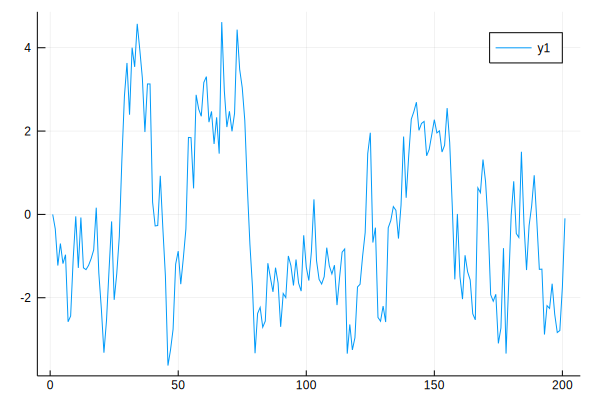

In [22]:
using Plots
function time(n, a)
    e = randn(n + 1)
    x = zeros(n + 1)
    for i in 1:n
        x[i + 1] = a * x[i] + e[i]
    end
    return x
end

n = 200
a = 0.9
plot(1:n + 1, time(n, a))

### Exercise 6

Plot three simulated time series, one for each of the cases $ \alpha = 0 $, $ \alpha = 0.8 $ and $ \alpha = 0.98 $

(The figure will illustrate how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities)


<a id='jbe-ex7'></a>

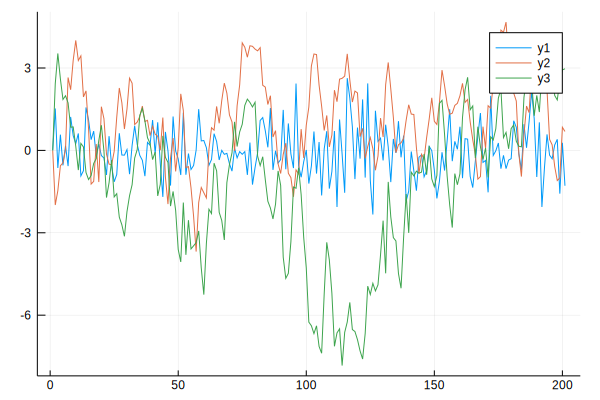

In [23]:
plot(1:n + 1, [time(n, 0), time(n, 0.8), time(n, 0.98)])

### Exercise 7

This exercise is more challenging

Take a random walk, starting from $ x_0 = 1 $

$$
x_{t+1} = \, \alpha \, x_t + \sigma\, \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 1
\quad \text{and} \quad t = 0,\ldots,t_{\max}
$$

- Furthermore, assume that the $ x_{t_{\max}} = 0 $  (i.e. at $ t_{\max} $, the value drops to zero, regardless of its current state)  
- The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal  
- For a given path $ \{x_t\} $ define a **first-passage time** as $ T_a = \min\{t\, |\, x_t \leq a\} $, where by the assumption of the process $ T_a \leq t_{\max} $  


Start with $ \sigma = 0.2, \alpha = 1.0 $

1. calculate the first-passage time, $ T_0 $, for 100 simulated random walks – to a $ t_{\max} = 200 $ and plot a histogram  
1. plot the sample mean of $ T_0 $ from the simulation for $ \alpha \in \{0.8, 1.0, 1.2\} $  



<a id='jbe-ex8a'></a>

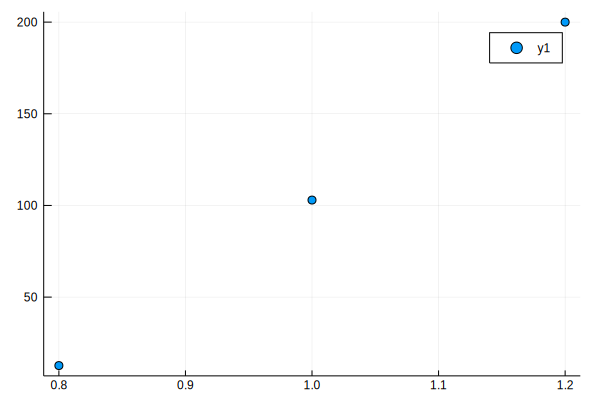

In [25]:
using Statistics
function fpt(n, tmax, a, alpha, o)
    T = fill(tmax, n)
    for i in 1:n
        x = zeros(tmax + 1)
        x[1] = 1
        e = randn(tmax + 1)
        for j in 1:tmax - 1
            x[j + 1] = alpha * x[j] + o * e[j]
            if x[j + 1] < a
                T[i] = j + 1
                break
            end
        end
    end
    return T
end
a = 0
tmax = 200
n = 100
histogram(fpt(n, tmax, a, 1, 0.2))
m = [mean(fpt(n, tmax, a, 0.8, 0.2)), mean(fpt(n, tmax, a, 1, 0.2)), mean(fpt(n, tmax, a, 1.2, 0.2))]
scatter([0.8, 1, 1.2], m)
#I didn't really understand what you meant with plot the mean

### Exercise 8(a)

This exercise is more challenging

The root of a univariate function $ f(\cdot) $ is an $ x $ such that $ f(x) = 0 $

One solution method to find local roots of smooth functions is called Newton’s method

Starting with an $ x_0 $ guess, a function $ f(\cdot) $ and the first-derivative $ f'(\cdot) $, the algorithm is to repeat

$$
x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

until $ | x^{n+1} - x^n| $ is below a tolerance

1. Use a variation of the `fixedpointmap` code to implement Newton’s method, where the function would accept arguments `f, f_prime, x_0, tolerance, maxiter`  
1. Test it with $ f(x) = (x-1)^3 $ and another function of your choice where you can analytically find the derivative  

In [2]:
function newton(f, f_prime, x_0, tolerance, maxiter)
    i = 0
    tol = Inf
    x_old = x_0
    while i <= maxiter && tol > tolerance
        x_new = x_old - f(x_old) / f_prime(x_old)
        tol = abs(x_new - x_old)
        x_old = x_new
        i += 1
    end
    if i >= maxiter
            println("No convergence: reached max iteration")
    end
    return x_old
end


newton (generic function with 1 method)

In [3]:
f = x-> x^2
f_prime = x-> 2 * x
println(newton(f, f_prime, 10, 0.01, 1000))

f = x->(x - 1)^3
f_prime = x->3 * (x - 1)^2
println(newton(f, f_prime, 10, 0.01, 1000))

0.009765625
1.013701949563127


### Exercise 8(b)

For those impatient to use more advanced features of Julia, implement a version of Exercise 8(a) where `f_prime` is calculated with auto-differentiation

In [369]:
using ForwardDiff

# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f, x)

# example usage: create a function and get the derivative
f(x) = x^2
f_prime = D(f)

f(0.1), f_prime(0.1)

ErrorException: cannot define function f; it already has a value

In [371]:
function newton2(f, x_0, tolerance, maxiter)
    i = 0
    tol = Inf
    x_old = x_0
    D(f) = x -> ForwardDiff.derivative(f, x)
    f_prime = D(f)
    while i <= maxiter && tol > tolerance
        x_new = x_old - f(x_old) / f_prime(x_old)
        tol = abs(x_new - x_old)
        x_old = x_new
        i += 1
    end
    if i >= maxiter
            println("No convergence: reached max iteration")
    end
    return x_old
end

newton2 (generic function with 1 method)

In [373]:
f = x-> x^2
println(newton2(f, 10, 0.01, 1000))

f = x->(x - 1)^3
println(newton2(f, 10, 0.01, 1000))

0.009765625
1.013701949563127


1. Using the `D(f)` operator definition above, implement a version of Newton’s method that does not require the user to provide an analytical derivative  
1. Test the sorts of `f` functions which can be automatically integrated by `ForwardDff.jl`  